In [1]:
import argparse
import torch
import os

from PIL import Image

import os
import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms as T
from tqdm.notebook import tqdm

transform = T.ToPILImage()
import torch.optim as optim
import json
import numpy as np
import torch.nn.functional as F
import torchaudio
import torch.nn as nn
import imagebind.data as data
from IPython.display import Audio



/home/eugene/miniconda3/envs/imagebind/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/home/eugene/miniconda3/envs/imagebind/lib/python3.8/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/eugene/miniconda3/envs/imagebind/lib/python3.8/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' m

In [2]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        tensor = tensor.clone()
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

def load_image(image_file):
    if image_file.startswith('http') or image_file.startswith('https'):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(image_file).convert('RGB')
    return image

DEFAULT_IMAGE_TOKEN = "<image>"
DEFAULT_IMAGE_PATCH_TOKEN = "<im_patch>"
DEFAULT_IM_START_TOKEN = "<im_start>"
DEFAULT_IM_END_TOKEN = "<im_end>"
unnorm = UnNormalize(mean=(0.48145466, 0.4578275, 0.40821073),
                    std=(0.26862954, 0.26130258, 0.27577711))

def di(image):
    display(transform(unnorm(image.data.detach().cpu())))

In [154]:
from torchvision import transforms

t = transforms.Normalize(
                    mean=(0.48145466, 0.4578275, 0.40821073),
                    std=(0.26862954, 0.26130258, 0.27577711),
                )

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:

from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType



# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)
0

0

In [5]:
imagebind = model

In [30]:

text_list=["Everything we see hides another thing",] #, we always want to see what is hidden by what we see, but it is impossible.
# text_list = ['Everything we see hides another thing, we always want to see what is hidden by what we see, but it is impossible.']
# image_paths=[".assets/car_image.jpg"] #".assets/dog_image.jpg", ".assets/car_image.jpg", ".assets/bird_image.jpg"]
# image_paths = ['horse.jpg']
# audio_paths=["all_assets/police3.wav"] # ".assets/car_audio.wav", ".assets/bird_audio.wav"

# Load data
inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    # ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    # ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    # embeddings = imagebind(inputs)
    text_embed = model.forward( {ModalityType.TEXT: data.load_and_transform_text(text_list, device)}, normalize=False)[ModalityType.TEXT] 
    # audio_embed = model.forward( {ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device)}, normalize=False)[ModalityType.AUDIO]
    # image_embed = model.forward({ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device)}, normalize=False)[ModalityType.VISION]


In [7]:
torch.save(text_embed.cpu(), 'hack/embed_eye.pt')

In [296]:

text_list=["a classical concert",]
# image_paths=["all_assets/dove.jpg"] #".assets/dog_image.jpg", ".assets/car_image.jpg", ".assets/bird_image.jpg"]
# image_paths = ['horse.jpg']
# audio_paths=[".assets/chips.wav"] # ".assets/car_audio.wav", ".assets/bird_audio.wav"

# Load data
inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    # ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    # ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    # embeddings = imagebind(inputs)
    text_embed = model.forward( {ModalityType.TEXT: data.load_and_transform_text(text_list, device)}, normalize=False)[ModalityType.TEXT] 
    # audio_embed = model.forward( {ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device)}, normalize=False)[ModalityType.AUDIO]
    # image_embed = model.forward({ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device)}, normalize=False)[ModalityType.VISION]


In [45]:
image_tensor = data.load_and_transform_vision_data(['all_assets/dog_image.jpg'], device)

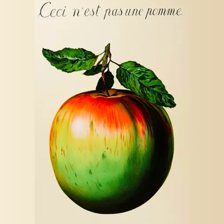

In [9]:
display(transform(unnorm(image_tensor.data[0].detach().cpu())))

# Attack

In [35]:
X = 0.01 * torch.rand_like(image_tensor)
X.requires_grad_(True)
0

0

In [41]:

epochs = 8000
optimizer = optim.SGD([X], lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer,
                              T_max = epochs, # Maximum number of iterations.
                              eta_min = 1e-5) # Minimum learning rate.

ValueError: can't optimize a non-leaf Tensor

In [42]:


pbar = tqdm(range(epochs))


for i in pbar:
    lr = scheduler.get_last_lr()[0]
    sum_tensor = (image_tensor + X)
    # sum_tensor.detach().clamp_(min=image_tensor.min(), max=image_tensor.max())
    
    embeds = model.forward({'vision': sum_tensor}, normalize=True)
    loss = 1 - F.cosine_similarity(embeds['vision'], ideal_embed, dim=1).mean()
    
    
    res3 = torch.autograd.grad(outputs=loss, inputs=X)
    
    X = X - lr * res3[0].sign()
    X.detach().clamp_(min=-0.05, max=0.05)

    

    
    pbar.set_postfix({'loss': loss.item(), 'lr': lr, 'norm': X.detach().norm().item()})


    scheduler.step()

    del res3, embeds, loss
    



  0%|          | 0/8000 [00:00<?, ?it/s]

KeyboardInterrupt: 

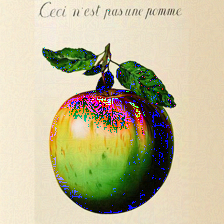

In [43]:
display(transform(unnorm((X+image_tensor).data[0].detach().cpu())))

In [22]:
import matplotlib.pyplot as plt

In [44]:
torch.save((X+image_tensor).detach().cpu(), './hack/image_attack.pt')